## CASK FR1 Correct Rate

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
from accuracy import graph_cumulative_acc, read_and_record, graph_group_stats
from intervals import perform_T_test
from path import fr1_male_path, fr1_male_sheets, fr1_female_path, fr1_female_sheets, \
                    rev_male_path, rev_male_sheets, rev_female_path, rev_female_sheets

export_root = '../export/Figure 1/'
os.makedirs(export_root, exist_ok=True)
male_ending_corr = []
female_ending_corr = []
male_learned_time = []
female_learned_time = []
male_acc_dict = {}
female_acc_dict = {}

## Female Group

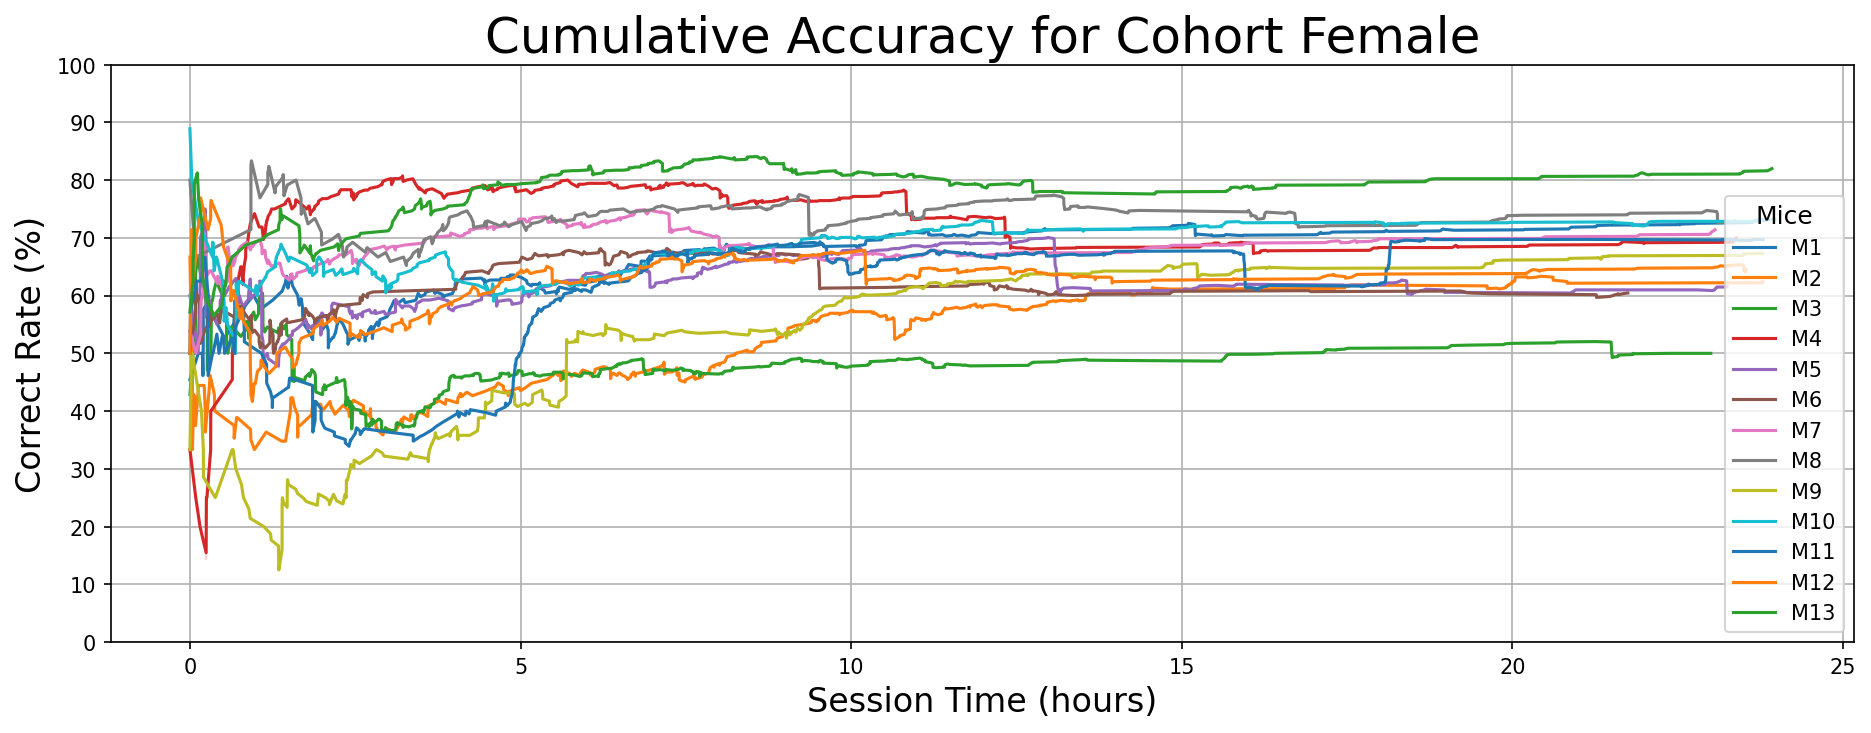

In [2]:
# R2M7 has false time signatures
group_data = []

for sheet in fr1_female_sheets:
    try:
        data = read_and_record(path=fr1_female_path, sheet=sheet, 
                            ending_corr=female_ending_corr, 
                            learned_time=female_learned_time,
                            acc_dict=female_acc_dict)
        group_data.append(data)
    except ValueError:
        continue
graph_cumulative_acc(group_data, 'Female', export_path=os.path.join(export_root, f'Female_FR1_Accuracy.svg'))

### Analysis

#### Time need to reach 80% for 2 cont. hours

In [12]:
perform_T_test(male_learned_time, female_learned_time, test_side='two-sided')

P Value is  0.004858243736113959
There is a significant difference between the two groups.


Male Size: 17
Female Size: 13
Male Average: 1.5002941176470588
Female Average: 4.687606837606838
Male Standard Deviation: 0.42633316937510973
Female Standard Deviation: 1.0073137526022675


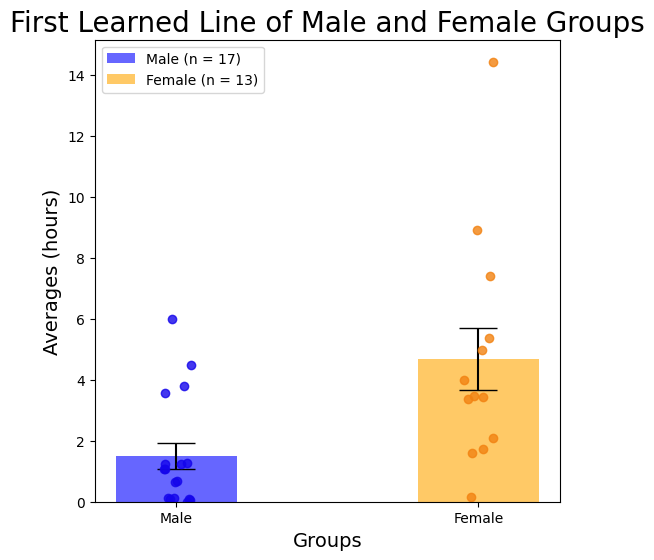

In [13]:
graph_group_stats(ctrl=male_learned_time, exp=female_learned_time, group_names=['Male', 'Female'], stats_name='First Learned Line', unit='hours',
                  export_path=os.path.join(export_root, '..', 'FR1_FirstLearnedLine_barplot.svg'))

In [14]:
import pickle
pickle.dump((male_acc_dict, female_acc_dict), open('../data/wt_fr1_acc.pkl', 'wb'))

#### Ctrl/Cask Ending/Overall Correct Rate

In [15]:
perform_T_test(male_ending_corr, female_ending_corr, test_side='two-sided')

P Value is  0.0001922549992009106
There is a significant difference between the two groups.


Male Size: 17
Female Size: 13
Male Average: 79.71485788454456
Female Average: 67.62417508009531
Male Standard Deviation: 1.7498016640381429
Female Standard Deviation: 2.1115941817503585


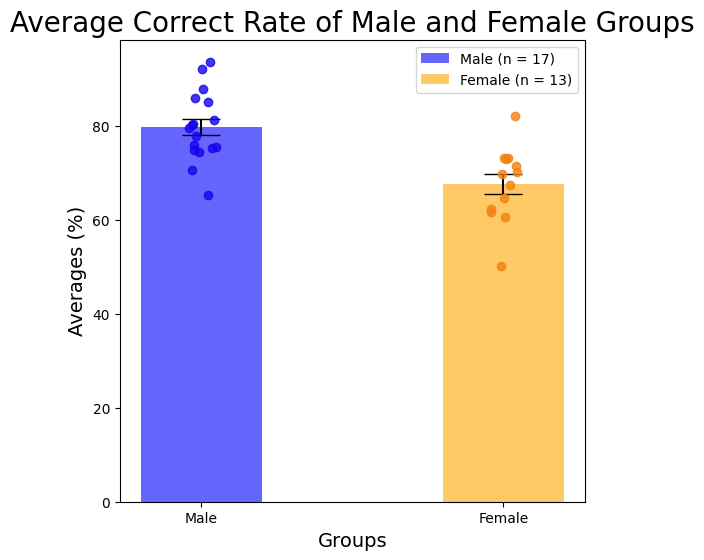

In [16]:
graph_group_stats(ctrl=male_ending_corr, exp=female_ending_corr, group_names=['Male', 'Female'], stats_name='Average Correct Rate', unit='%',
                  export_path=os.path.join(export_root, '..', 'FR1_accuracy_barplot.svg'))